In [1]:
import pandas as pd
import os

In [2]:
train_df = pd.read_csv(os.path.abspath('../input/cleaned-2007-2017.csv'))

### Create historical features

In [3]:
train_df.columns.values

array(['match_id', 'tournament_name', 'season', 'tournament_id', 'date',
       'level', 'surface', 'round', 'best_of', 'player_id', 'player_rank',
       'player_elo_rating', 'opponent_id', 'opponent_rank',
       'opponent_elo_rating', 'outcome', 'p_1st_in', 'o_1st_in',
       'p_sv_pt', 'o_sv_pt', 'p_1st_won', 'o_1st_won', 'p_2nd_won',
       'o_2nd_won', 'p_ace', 'o_ace', 'p_df', 'o_df', 'p_bp_sv',
       'o_bp_sv', 'p_bp_fc', 'o_bp_fc', 'p_matches', 'o_matches',
       'p_sv_gms'], dtype=object)

In [4]:
train_df.head()

,match_id,tournament_name,season,tournament_id,date,level,surface,round,best_of,player_id,...,o_ace,p_df,o_df,p_bp_sv,o_bp_sv,p_bp_fc,o_bp_fc,p_matches,o_matches,p_sv_gms
0,137522.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,3344.0,...,6.0,4.0,1.0,9.0,6.0,11.0,7.0,0.0,1.0,12.0
1,137523.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,2703.0,...,7.0,2.0,1.0,2.0,5.0,5.0,6.0,0.0,1.0,11.0
2,137524.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,4654.0,...,1.0,3.0,0.0,6.0,2.0,11.0,3.0,0.0,1.0,8.0
3,137525.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,4385.0,...,7.0,4.0,4.0,4.0,4.0,7.0,9.0,0.0,1.0,16.0
4,137526.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,4416.0,...,8.0,5.0,4.0,5.0,7.0,7.0,9.0,0.0,1.0,13.0


In [5]:
train_df.iterrows()

<generator object DataFrame.iterrows at 0x000002135407ADC8>

In [6]:
p_1st_in = train_df[
    (train_df['player_id'] == 3344)
]['p_1st_in'].sum()
p_1st_in

11692.0

In [7]:
p_sv_pt = train_df[
    (train_df['player_id'] == 3344)
]['p_sv_pt'].sum()
p_sv_pt

19846.0

In [8]:
p_1st_in / p_sv_pt

0.5891363498941852

In [9]:
train_df[train_df['date'] <= '2008-05-05']

,match_id,tournament_name,season,tournament_id,date,level,surface,round,best_of,player_id,...,o_ace,p_df,o_df,p_bp_sv,o_bp_sv,p_bp_fc,o_bp_fc,p_matches,o_matches,p_sv_gms
0,137522.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,3344.0,...,6.0,4.0,1.0,9.0,6.0,11.0,7.0,0.0,1.0,12.0
1,137523.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,2703.0,...,7.0,2.0,1.0,2.0,5.0,5.0,6.0,0.0,1.0,11.0
2,137524.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,4654.0,...,1.0,3.0,0.0,6.0,2.0,11.0,3.0,0.0,1.0,8.0
3,137525.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,4385.0,...,7.0,4.0,4.0,4.0,4.0,7.0,9.0,0.0,1.0,16.0
4,137526.0,Rome Masters,2008.0,11.0,05/05/2008,M,C,R64,3.0,4416.0,...,8.0,5.0,4.0,5.0,7.0,7.0,9.0,0.0,1.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59278,173763.0,Australian Open,2016.0,1.0,18/01/2016,G,H,R128,5.0,6107.0,...,28.0,1.0,4.0,5.0,10.0,8.0,11.0,0.0,1.0,27.0
59279,173764.0,Australian Open,2016.0,1.0,18/01/2016,G,H,R128,5.0,3794.0,...,5.0,6.0,1.0,4.0,4.0,12.0,8.0,0.0,1.0,16.0
59280,173765.0,Australian Open,2016.0,1.0,18/01/2016,G,H,R128,5.0,4592.0,...,8.0,3.0,2.0,3.0,4.0,8.0,5.0,0.0,1.0,16.0
59281,173766.0,Australian Open,2016.0,1.0,18/01/2016,G,H,R128,5.0,5140.0,...,14.0,3.0,7.0,3.0,12.0,10.0,15.0,0.0,1.0,19.0


In [10]:
from datetime import datetime

In [11]:
train_df['datetime'] = train_df['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [12]:
train_df[
    (train_df['datetime'] < train_df['date'][0]) 
    & (train_df['player_id'] == 3344)
    & (train_df['surface'] == 'C')
]

,match_id,tournament_name,season,tournament_id,date,level,surface,round,best_of,player_id,...,p_df,o_df,p_bp_sv,o_bp_sv,p_bp_fc,o_bp_fc,p_matches,o_matches,p_sv_gms,datetime
1209,135262.0,Umag,2007.0,301.0,23/07/2007,B,C,R32,3.0,3344.0,...,2.0,2.0,8.0,4.0,12.0,7.0,0.0,1.0,12.0,2007-07-23
1938,134477.0,Hamburg,2007.0,10.0,14/05/2007,M,C,R32,3.0,3344.0,...,1.0,1.0,11.0,8.0,13.0,13.0,1.0,0.0,13.0,2007-05-14
2048,134624.0,Roland Garros,2007.0,19.0,28/05/2007,G,C,R64,5.0,3344.0,...,0.0,1.0,3.0,7.0,4.0,11.0,1.0,0.0,21.0,2007-05-28
3151,134223.0,Monte Carlo Masters,2007.0,9.0,15/04/2007,M,C,R32,3.0,3344.0,...,1.0,3.0,8.0,11.0,8.0,11.0,1.0,0.0,12.0,2007-04-15
3474,134526.0,Poertschach,2007.0,277.0,20/05/2007,B,C,R32,3.0,3344.0,...,1.0,2.0,1.0,3.0,2.0,4.0,1.0,0.0,12.0,2007-05-20
3515,134568.0,Roland Garros,2007.0,19.0,28/05/2007,G,C,R128,5.0,3344.0,...,2.0,3.0,2.0,4.0,3.0,8.0,1.0,0.0,16.0,2007-05-28
5468,134235.0,Monte Carlo Masters,2007.0,9.0,15/04/2007,M,C,R16,3.0,3344.0,...,5.0,7.0,13.0,2.0,18.0,5.0,0.0,1.0,16.0,2007-04-15
5614,134422.0,Rome Masters,2007.0,11.0,07/05/2007,M,C,R32,3.0,3344.0,...,2.0,1.0,5.0,2.0,9.0,3.0,0.0,1.0,10.0,2007-05-07
5745,134491.0,Hamburg,2007.0,10.0,14/05/2007,M,C,R16,3.0,3344.0,...,1.0,0.0,3.0,3.0,7.0,4.0,0.0,1.0,9.0,2007-05-14
5793,134540.0,Poertschach,2007.0,277.0,20/05/2007,B,C,R16,3.0,3344.0,...,2.0,0.0,3.0,1.0,4.0,1.0,0.0,1.0,11.0,2007-05-20


We won't compute statistic for year 2007 because due to few matches statistics would not be representative of player levels

We create a dataset excluding 2007 :

In [13]:
train_df_gt_2008 = train_df[train_df['datetime'] > '2008-01-01']

In [14]:
import numpy as np

In [130]:
from tqdm.notebook import tqdm

fs_column = []
w1sp_column = []
w2sp_column = []
wrp_column = []
tpw_column = []
tmw_column = []
aces_per_game_column = []
df_per_game_column = []
bp_won_column = []

number_of_matches_used_column = []

number_of_matches_to_include = 2000

pbar = tqdm(total=train_df_gt_2008.head(n=number_of_matches_to_include).shape[0])

for index, row in train_df_gt_2008.head(n=number_of_matches_to_include).iterrows():
    # filter dataset to keep only player matches prior to current match
    filtered_dataset = train_df[
        (train_df['datetime'] < datetime.strptime(row['date'], '%d/%m/%Y')) 
        & (train_df['player_id'] == row['player_id'])
    ]

    # initialize temp variables to calculate features
    p_1st_in = p_sv_pt = p_1st_won = p_2nd_won = o_sv_pt = o_1st_won = o_2nd_won = o_sv_pt = p_matches \
    = o_matches = p_ace = p_df = p_sv_gms = p_bp_sv = o_bp_sv = p_bp_fc = o_bp_fc = number_of_matches_used = 0

    # initialize variable features
    fs = w1sp = w2sp = wrp = tpw = tmw = aces_per_game = df_per_game = bp_won = np.nan

    # calculate statistics averaging with time discounting and surface weighting
    if(filtered_dataset.shape[0] != 0):
        for f_index, f_row in filtered_dataset.iterrows():
            p_1st_in += f_row['p_1st_in']
            p_sv_pt += f_row['p_sv_pt']
            p_1st_won += f_row['p_1st_won']
            p_2nd_won += f_row['p_2nd_won']
            o_sv_pt += f_row['o_sv_pt']
            o_1st_won += f_row['o_1st_won']
            o_2nd_won += f_row['o_2nd_won']
            o_sv_pt += f_row['o_sv_pt']
            p_matches += f_row['p_matches']
            o_matches += f_row['o_matches']
            p_ace += f_row['p_ace']
            p_df += f_row['p_df']
            p_sv_gms += f_row['p_sv_gms']
            p_bp_sv += f_row['p_bp_sv']
            o_bp_sv += f_row['o_bp_sv']
            p_bp_fc += f_row['p_bp_fc']
            o_bp_fc += f_row['o_bp_fc']

        # Compute features 

        # first serve sucess percentage
        fs = p_1st_in / p_sv_pt

        # winning on first serve percentage
        w1sp = p_1st_won / p_1st_in

        # winning on second serve percentage
        w2sp = p_2nd_won / (p_sv_pt - p_1st_in)
        
        # winning on return percentage
        wrp = (o_sv_pt - o_1st_won - o_2nd_won) / o_sv_pt
        
        # percentage of all points won
        tpw = (p_1st_won + p_2nd_won + (o_sv_pt - o_1st_won - o_2nd_won) ) / (p_sv_pt + o_sv_pt)
        
        # percentage of all matches won
        tmw = p_matches / (p_matches + o_matches)
        
        # Average number of aces per game
        aces_per_game = p_ace / p_sv_gms
        
        # Average number of double faults per game
        df_per_game = p_df / p_sv_gms
        
        # Percentage of breakpoints won
        bp_won = (p_bp_sv + o_bp_sv) / (p_bp_fc + o_bp_fc)
        
        # number of matches used to compute statistics
        number_of_matches_used = filtered_dataset.shape[0]

    fs_column.append(fs)
    w1sp_column.append(w1sp)
    w2sp_column.append(w2sp)
    wrp_column.append(wrp)
    tpw_column.append(tpw)
    tmw_column.append(tmw)
    aces_per_game_column.append(aces_per_game)
    df_per_game_column.append(df_per_game)
    bp_won_column.append(bp_won)
    number_of_matches_used_column.append(number_of_matches_used)

    # number of matches computed to have stats
    number_of_matches_computed.append(filtered_dataset.shape[0])

    # progress
    pbar.update(1)
    
pbar.close()

result_test_df = pd.DataFrame({'fs': fs_column, 'w1sp': w1sp_column, 'w2sp': w2sp_column, 'wrp': wrp_column, 
                               'tpw': tpw_column, 'tmw': tmw_column, 'aces_per_game': aces_per_game_column,
                               'df_per_game': df_per_game_column, 'bp_won': bp_won_column, 'number_of_matches_used': number_of_matches_used_column
                              })

In [135]:
result_test_df['player_id'] = train_df_gt_2008.head(n=number_of_matches_to_include)['player_id']
result_test_df['opponent_id'] = train_df_gt_2008.head(n=number_of_matches_to_include)['opponent_id']
result_test_df['tournament_name'] = train_df_gt_2008.head(n=number_of_matches_to_include)['tournament_name']
result_test_df['date'] = train_df_gt_2008.head(n=number_of_matches_to_include)['date']

In [136]:
result_test_df.head()

,fs,w1sp,w2sp,wrp,tpw,tmw,aces_per_game,df_per_game,bp_won,number_of_matches_used,player_id,opponent_id,tournament_name,date
0,0.591613,0.779391,0.526186,0.675453,0.675630,0.630137,0.998942,0.165079,0.652812,73,3344.0,4326.0,Rome Masters,05/05/2008
1,0.630058,0.688413,0.515046,0.685150,0.664963,0.474576,0.244813,0.147994,0.627497,59,2703.0,4214.0,Rome Masters,05/05/2008
2,0.605263,0.633270,0.533333,0.688475,0.655906,0.416667,0.356589,0.155039,0.592357,12,4654.0,4337.0,Rome Masters,05/05/2008
3,0.551402,0.751156,0.504735,0.675158,0.663711,0.517857,0.598131,0.209613,0.592053,56,4385.0,3602.0,Rome Masters,05/05/2008
4,0.616279,0.760220,0.515783,0.693343,0.684524,0.631579,0.682090,0.231343,0.583082,57,4416.0,5088.0,Rome Masters,05/05/2008


In [137]:
result_test_df['number_of_matches_used'].describe()

count    2000.000000
mean       62.059500
std        35.786887
min         0.000000
25%        37.000000
50%        61.000000
75%        83.000000
max       244.000000
Name: number_of_matches_used, dtype: float64

In [138]:
np.isnan(result_test_df['fs']).sum()

18

Density function :

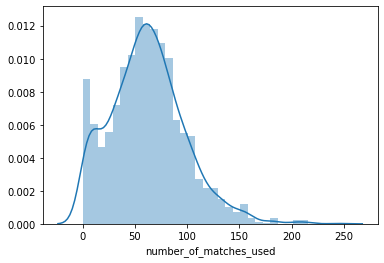

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(result_test_df['number_of_matches_used'])
plt.show()

Cumulative distribution function :

In [140]:
cdf = result_test_df['number_of_matches_used'].value_counts().sort_index()

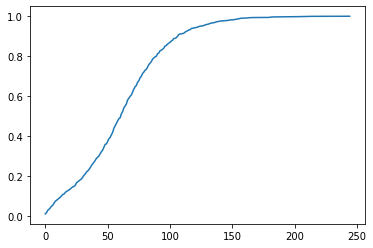

In [141]:
plt.plot(cdf.index, cdf.cumsum() / cdf.cumsum().max())

In [142]:
cdf[cdf.index < 50].sum() / cdf.cumsum().max()

0.36

We have 36 % of our matches that have less than 50 matches to compute our statistics